In [1]:
%matplotlib inline
import numpy as np
import sklearn
import matplotlib.pyplot as plt

np.random.seed(0)  # fix the behavior of the random number generator, which is controlled by the seed (set to 0 here)

def draw_graph(f):
    fig, ax = plt.subplots()
    X_ = np.linspace(0, 10, 1000)
    Y_ = f(X_)
    ax.plot(X_, Y_, 'r')
    ax.scatter(X, Y)

In [2]:
# make artificial training data points determined by a*x + b + e where:
#   weight a and bias b are randomly generated numbers shared among all the data points 
#   input x and noise e are numbers generated randomly for each data point

a = np.random.rand()
b = np.random.rand()

n = 100                       # the number of training data points
X = np.random.rand(n,1) * 10  # make n input numbers from 0 to 10
E = np.random.rand(n,1) * 0.8 # make n noise numbers from 0 to 0.8

Y = X * a + b + E               # make n output numbers a*x + b + e 
                                #   (where x = X[i] and e = E[i] for each i between 0 to 99)

print('a:', a, 'b:', b)
print('Shape of X:', X.shape)
print('Shape of e:', E.shape)
print('Shape of Y:', Y.shape)
print('Y[0] =', Y[0][0])
print('X[0]*a + b + E[0] =', (X[0]*a + b + E[0])[0])

a: 0.5488135039273248 b: 0.7151893663724195
Shape of X: (100, 1)
Shape of e: (100, 1)
Shape of Y: (100, 1)
Y[0] = 4.611391388679922
X[0]*a + b + E[0] = 4.611391388679922


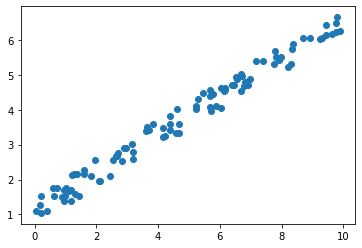

In [3]:
plt.scatter(X,Y)

learned weight: 0.5434880375042673
learned bias: 1.1631473877465681
diff of weight 0.005325466423057423
diff of bias 0.44795802137414864


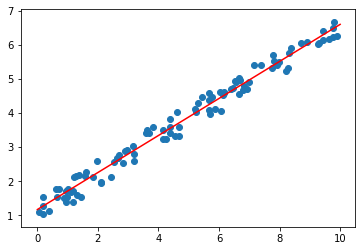

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)               # train on inputs X and outputs Y
print('learned weight:', model.coef_[0][0])
print('learned bias:', model.intercept_[0])
print('diff of weight', abs(a-model.coef_[0][0]))
print('diff of bias', abs(b-model.intercept_[0]))

draw_graph(lambda X_: X_ * model.coef_[0][0] + model.intercept_[0])

In [5]:
### optimization by simultaneous equations solving

weight: 0.5434880375042677 bias: 1.1631473877465663


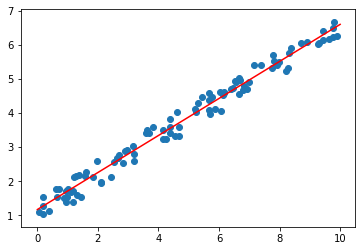

In [6]:
a_ = ((X*Y).sum() - n * Y.mean() * X.mean()) / ((X*X).sum() - n * X.mean() * X.mean())
b_ = Y.mean() - a_ * X.mean()

print('weight:', a_, 'bias:', b_)
draw_graph(lambda X_: a_ * X_ + b_)

weight: 0.5434880375046133 bias: 1.1631473877443421


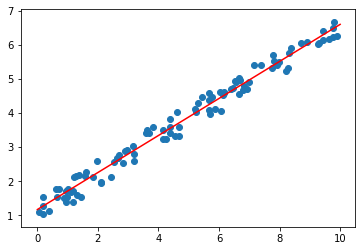

In [7]:
### optimization by gradient descent
def grad_descent(a, b, lr, n, X, Y):
    for _ in range(0, n):  # repeat n updates
        Y_pred = a * X + b
        Y_diff = Y_pred - Y
        a = a - lr * (X * Y_diff).mean()
        b = b - lr * Y_diff.mean()
    return a, b

a_, b_ = grad_descent(np.random.rand(), np.random.rand(), 0.001, 100000, X, Y)
print('weight:', a_, 'bias:', b_)
draw_graph(lambda X_: a_ * X_ + b_)